## import required libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import files
import io
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  as scoreprecision_recall_fscore_support
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve

**Read static data in a dataframe**

In [ ]:
def read_data(file_name):
  data = files.upload()
  df = pd.read_csv(io.BytesIO(data[file_name]))
  return df

In [ ]:
df = read_data('iot_static_data.csv')

Saving iot_static_data.csv to iot_static_data.csv


**See the names of dataset columns**

In [ ]:
df.columns

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'MI_dir_L0.1_weight',
       ...
       'HpHp_L0.1_pcc', 'HpHp_L0.01_weight', 'HpHp_L0.01_mean',
       'HpHp_L0.01_std', 'HpHp_L0.01_magnitude', 'HpHp_L0.01_radius',
       'HpHp_L0.01_covariance', 'HpHp_L0.01_pcc', 'Source', 'Class'],
      dtype='object', length=117)

**See number of samples inside dataset**

In [ ]:
print(len(df))

25609


In [ ]:
df.head(3)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Source,Class
0,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,36954.21504,33.115077,123.515434,27655.53889,62.619034,102.471926,15409.86815,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,36954.21504,33.115077,123.515434,27655.53889,62.619034,102.471926,15409.86815,18.885473,156.041505,202.780449,349.823034,160261.014500,-29563.398800,-0.370432,20.044037,154.488822,200.790831,...,30.034811,5.307252,129.851752,4.880738,181.620841,227.548005,291.835506,59579.844560,17447.876,0.446623,4.927844,181.698241,227.581665,291.280119,59578.905890,17793.81865,0.455634,4.975746,181.767997,227.609424,290.719232,59575.027260,18141.80757,0.464725,4.997565,181.796886,227.619989,290.465036,59572.320380,18299.05366,0.468843,4.999756,181.799689,227.620979,290.439555,59572.01682,18314.80015,0.469256,Provision PT 838 Security Camera,BENIGN
1,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,53449.81973,98.214224,164.300338,51038.67281,124.460107,146.697496,42083.22328,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,53449.81973,98.214224,164.300338,51038.67281,124.460107,146.697496,42083.22328,49.886530,169.313860,233.534964,295.273638,90407.873240,-2457.802895,-0.039193,62.898830,169.837418,233.073744,...,97.549007,1.686998,63.199293,1.980432,69.960478,3.999805,101.835497,15.998438,0.000,0.000000,1.988213,69.976286,3.999930,101.846358,15.999438,0.00000,0.000000,1.996055,69.992095,3.999992,101.857221,15.999938,0.00000,0.000000,1.999605,69.999210,4.000000,101.862109,15.999999,0.00000,0.000000,1.999960,69.999921,4.000000,101.862598,16.00000,0.00000,0.000000,Provision PT 737E Security Camera,BENIGN
2,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,11039.48506,4.621621,278.780846,34237.68791,29.401508,286.241737,32040.66862,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,11039.48506,4.621621,278.780846,34237.68791,29.401508,286.241737,32040.66862,1.996402,449.036043,19.999968,449.036043,399.998701,0.000000,0.000000,1.997840,449.021626,19.999988,...,14.978833,10.667405,206.157032,1.996402,449.036043,19.999968,449.036043,399.998701,0.000,0.000000,1.997840,449.021626,19.999988,449.021626,399.999532,0.00000,0.000000,1.999279,449.007209,19.999999,449.007209,399.999948,0.00000,0.000000,2.428558,450.295009,20.081460,450.295009,403.265056,0.00000,0.000000,14.978833,455.354366,19.592951,455.354366,383.88371,0.00000,0.000000,Samsung SNH 1011 N Webcam,BENIGN


**Return a list of columns names which contains null values if any "There is no columns contains null values"**

In [ ]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

[]


##check if theisny inf values **There is no infvalues in the dataset**

In [ ]:
col_inf = df[df==float("inf")].any()
# for i in range(len(col_inf)):
#   print(col_inf[i])

**Get information about the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25609 entries, 0 to 25608
Columns: 117 entries, MI_dir_L5_weight to Class
dtypes: float64(115), object(2)
memory usage: 22.9+ MB


**Set features in X without class column**

In [ ]:
X = df.drop(labels = ["Class"], axis=1) 
len(X)

25609

In [ ]:
X

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Source
0,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,3.695422e+04,33.115077,123.515434,27655.538890,62.619034,102.471926,15409.868150,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,3.695422e+04,33.115077,123.515434,27655.538890,62.619034,102.471926,15409.868150,18.885473,156.041505,2.027804e+02,349.823034,1.602610e+05,-2.956340e+04,-3.704318e-01,20.044037,154.488822,200.790831,...,5.552689e+01,30.034811,5.307252,1.298518e+02,4.880738,181.620841,227.548005,291.835506,59579.844560,1.744788e+04,0.446623,4.927844,181.698241,2.275817e+02,291.280119,5.957891e+04,1.779382e+04,4.556339e-01,4.975746,181.767997,227.609424,290.719232,5.957503e+04,1.814181e+04,0.464725,4.997565,181.796886,2.276200e+02,290.465036,5.957232e+04,1.829905e+04,4.688430e-01,4.999756,181.799689,2.276210e+02,290.439555,5.957202e+04,1.831480e+04,4.692557e-01,Provision PT 838 Security Camera
1,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,5.344982e+04,98.214224,164.300338,51038.672810,124.460107,146.697496,42083.223280,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,5.344982e+04,98.214224,164.300338,51038.672810,124.460107,146.697496,42083.223280,49.886530,169.313860,2.335350e+02,295.273638,9.040787e+04,-2.457803e+03,-3.919336e-02,62.898830,169.837418,233.073744,...,1.748666e+01,97.549007,1.686998,6.319929e+01,1.980432,69.960478,3.999805,101.835497,15.998438,0.000000e+00,0.000000,1.988213,69.976286,3.999930e+00,101.846358,1.599944e+01,0.000000e+00,0.000000e+00,1.996055,69.992095,3.999992,101.857221,1.599994e+01,0.000000e+00,0.000000,1.999605,69.999210,4.000000e+00,101.862109,1.600000e+01,0.000000e+00,0.000000e+00,1.999960,69.999921,4.000000e+00,101.862598,1.600000e+01,0.000000e+00,0.000000e+00,Provision PT 737E Security Camera
2,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,1.103949e+04,4.621621,278.780846,34237.687910,29.401508,286.241737,32040.668620,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,1.103949e+04,4.621621,278.780846,34237.687910,29.401508,286.241737,32040.668620,1.996402,449.036043,1.999997e+01,449.036043,3.999987e+02,0.000000e+00,0.000000e+00,1.997840,449.021626,19.999988,...,2.241555e+02,14.978833,10.667405,2.061570e+02,1.996402,449.036043,19.999968,449.036043,399.998701,0.000000e+00,0.000000,1.997840,449.021626,1.999999e+01,449.021626,3.999995e+02,0.000000e+00,0.000000e+00,1.999279,449.007209,19.999999,449.007209,3.999999e+02,0.000000e+00,0.000000,2.428558,450.295009,2.008146e+01,450.295009,4.032651e+02,0.000000e+00,0.000000e+00,14.978833,455.354366,1.959295e+01,455.354366,3.838837e+02,0.000000e+00,0.0000

**Set labels of the traffic into y**

In [ ]:
y = df["Class"].values
len(y)

25609

In [ ]:
y

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

**See how many samples are exist in each class**

In [ ]:
df.Class.value_counts()

BENIGN                   22287
mirai_udp_attack          1774
gafgyt_udp_attack          446
gafgyt_junk_attack         377
gafgyt_tcp_attack          213
gafgyt_scan_attack         200
mirai_syn_attack           101
mirai_ack_attack            96
mirai_scan_attack           86
gafgyt_combo_attack         18
mirai_udpplain_attack       11
Name: Class, dtype: int64

## **Plot the distribution of each class**
#### And the is big differences between the samples number "imbalance".

#### A ==> BENIGN
#### B ==> mirai_udp_attack
#### C ==> gafgyt_udp_attack
#### D ==> gafgyt_junk_attack
#### E ==> gafgyt_tcp_attack
#### F ==> gafgyt_scan_attack
#### G ==> mirai_syn_attack
#### H ==> mirai_ack_attack
#### I ==> mirai_scan_attack
#### J ==> gafgyt_combo_attack
#### k ==> mirai_udpplain_attack

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


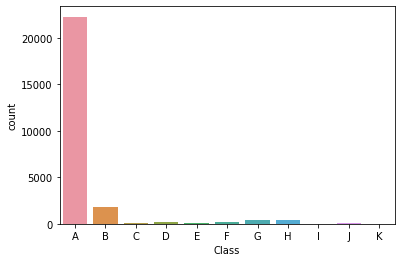

In [ ]:
# A ==> BENIGN
# B ==> mirai_udp_attack
# C ==> gafgyt_udp_attack
# D ==> gafgyt_junk_attack
# E ==> gafgyt_tcp_attack
# F ==> gafgyt_scan_attack
# G ==> mirai_syn_attack
# H ==> mirai_ack_attack
# I ==> mirai_scan_attack
# J ==> gafgyt_combo_attack
# k ==> mirai_udpplain_attack
g = sns.countplot(df['Class'])
g.set_xticklabels(['A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'])
plt.show()

**Get the columns which contain categorical values**

In [ ]:
#Get all columns
all_cols = df.columns
#Get numerical columns
num_cols = df._get_numeric_data().columns
#multiply the set of numerical columns from the set of all columns and set the result in a list (it is the list of categorical columns)
cat_cols = list(set(all_cols) - set(num_cols))
cat_cols

['Source', 'Class']

**So, we have inside X ==> "source column has categorical values. and I will convert it into numerical using get_dummies method**

In [ ]:
# One-hot encode the data using pandas get_dummies
X = pd.get_dummies(X)

X.head(2)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Source_Danmini Doorbell,Source_Ecobee Thermostat,Source_Ennio Doorbell,Source_Philips B120N10 Baby Monitor,Source_Provision PT 737E Security Camera,Source_Provision PT 838 Security Camera,Source_Samsung SNH 1011 N Webcam,Source_SimpleHome XCS7 1002 WHT Security Camera,Source_SimpleHome XCS7 1003 WHT Security Camera
0,19.570634,152.679121,39991.93764,20.937891,150.455024,38960.67406,23.168006,145.454142,36954.21504,33.115077,123.515434,27655.53889,62.619034,102.471926,15409.86815,19.570634,152.679121,39991.93764,20.937891,150.455024,38960.67406,23.168006,145.454142,36954.21504,33.115077,123.515434,27655.53889,62.619034,102.471926,15409.86815,18.885473,156.041505,202.780449,349.823034,160261.01450,-29563.398800,-0.370432,20.044037,154.488822,200.790831,...,59579.844560,17447.876,0.446623,4.927844,181.698241,227.581665,291.280119,59578.905890,17793.81865,0.455634,4.975746,181.767997,227.609424,290.719232,59575.027260,18141.80757,0.464725,4.997565,181.796886,227.619989,290.465036,59572.320380,18299.05366,0.468843,4.999756,181.799689,227.620979,290.439555,59572.01682,18314.80015,0.469256,0,0,0,0,0,1,0,0,0
1,49.893840,169.297843,54532.33872,62.957476,169.735104,54283.99504,82.340884,168.919514,53449.81973,98.214224,164.300338,51038.67281,124.460107,146.697496,42083.22328,49.893840,169.297843,54532.33872,62.957476,169.735104,54283.99504,82.340884,168.919514,53449.81973,98.214224,164.300338,51038.67281,124.460107,146.697496,42083.22328,49.886530,169.313860,233.534964,295.273638,90407.87324,-2457.802895,-0.039193,62.898830,169.837418,233.073744,...,15.998438,0.000,0.000000,1.988213,69.976286,3.999930,101.846358,15.999438,0.00000,0.000000,1.996055,69.992095,3.999992,101.857221,15.999938,0.00000,0.000000,1.999605,69.999210,4.000000,101.862109,15.999999,0.00000,0.000000,1.999960,69.999921,4.000000,101.862598,16.00000,0.00000,0.000000,0,0,0,0,1,0,0,0,0


**The data has a high varient in its values. So, I will apply standard scalar**

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

**Get only important features using boruta model**

In [ ]:
clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=5)

In [ ]:
pip install boruta

     |████████████████████████████████| 56 kB 2.2 MB/s 


In [ ]:
from boruta import BorutaPy

In [ ]:
trans = BorutaPy(clf, n_estimators = 'auto', random_state=42, verbose=2, max_iter = 150)
sel = trans.fit_transform(X_scaled, y)

Iteration: 	1 / 150
Confirmed: 	0
Tentative: 	124
Rejected: 	0
Iteration: 	2 / 150
Confirmed: 	0
Tentative: 	124
Rejected: 	0
Iteration: 	3 / 150
Confirmed: 	0
Tentative: 	124
Rejected: 	0
Iteration: 	4 / 150
Confirmed: 	0
Tentative: 	124
Rejected: 	0
Iteration: 	5 / 150
Confirmed: 	0
Tentative: 	124
Rejected: 	0
Iteration: 	6 / 150
Confirmed: 	0
Tentative: 	124
Rejected: 	0
Iteration: 	7 / 150
Confirmed: 	0
Tentative: 	124
Rejected: 	0
Iteration: 	8 / 150
Confirmed: 	90
Tentative: 	19
Rejected: 	15
Iteration: 	9 / 150
Confirmed: 	90
Tentative: 	19
Rejected: 	15
Iteration: 	10 / 150
Confirmed: 	90
Tentative: 	19
Rejected: 	15
Iteration: 	11 / 150
Confirmed: 	90
Tentative: 	19
Rejected: 	15
Iteration: 	12 / 150
Confirmed: 	93
Tentative: 	16
Rejected: 	15
Iteration: 	13 / 150
Confirmed: 	93
Tentative: 	16
Rejected: 	15
Iteration: 	14 / 150
Confirmed: 	93
Tentative: 	14
Rejected: 	17
Iteration: 	15 / 150
Confirmed: 	93
Tentative: 	14
Rejected: 	17
Iteration: 	16 / 150
Confirmed: 	93
Tenta

In [ ]:
#true: means important feature
#false: means rejected feature
print(trans.support_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True  True  True False False  True  True  True  True
  True False False  True  True  True  True  True False False  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True  True  True  True  True False False  True  True
  True  True  True False False  True  True  True  True  True False False
  True  True  True  True  True False False False False False False False
 False False False False]


**Take only the important features to train the model (95 feature)**

In [ ]:
X_scaled_fea = trans.transform(X_scaled)
# X_scaled_fea
df_features = pd.DataFrame(X_scaled_fea)
df_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,0.075753,0.108800,1.207787,-0.058000,0.093485,1.138783,-0.223422,0.049789,1.053766,-0.308035,-0.170746,0.514929,-0.294637,-0.367038,-0.018712,0.075753,0.108800,1.207787,-0.058000,0.093485,1.138783,-0.223422,0.049789,1.053766,-0.308035,-0.170755,0.514929,-0.294637,-0.367058,-0.018715,0.302107,0.119451,2.968875,0.876593,2.462556,0.113550,0.109398,2.917150,0.910084,2.528137,...,0.302107,-0.252973,-0.045728,0.113550,-0.253406,-0.049688,-0.116864,-0.255489,-0.075486,-0.238169,-0.262715,-0.102881,-0.239359,-0.266642,-0.121008,0.406227,0.277542,3.509286,0.603798,1.293244,0.294246,0.279364,3.422072,0.603605,1.234549,0.150730,0.283263,3.324570,0.606347,1.164203,0.011120,0.291680,3.201770,0.630669,1.065900,-0.038102,0.306111,3.171844,0.650817,0.975140
1,0.813787,0.236960,1.752785,0.589157,0.245702,1.707527,0.098306,0.241592,1.680367,-0.269625,0.196833,1.354607,-0.289419,0.050186,1.013679,0.813787,0.236960,1.752785,0.589157,0.245702,1.707527,0.098306,0.241591,1.680367,-0.269625,0.196815,1.354607,-0.289419,0.050123,1.013677,1.358379,0.212229,3.464959,0.569860,1.281945,1.031635,0.217550,3.436335,0.589161,1.313824,...,1.358379,-0.252973,-0.045728,1.031635,-0.253406,-0.049688,0.339722,-0.255489,-0.075486,-0.177349,-0.262715,-0.102881,-0.229387,-0.266642,-0.121008,0.030849,-0.475924,-0.193647,-0.468318,-0.192477,0.005558,-0.481184,-0.198254,-0.470926,-0.193402,-0.026939,-0.488040,-0.207052,-0.473756,-0.193626,-0.045363,-0.491403,-0.260146,-0.474887,-0.207922,-0.049071,-0.489318,-0.299848,-0.479330,-0.233552
2,-0.351982,2.394062,-0.275835,-0.349632,2.443737,-0.279858,-0.337608,2.286768,0.069370,-0.324847,1.228602,0.751291,-0.297440,1.366646,0.624982,-0.351982,2.394062,-0.275835,-0.349632,2.443737,-0.279858,-0.337608,2.286768,0.069370,-0.324847,1.228561,0.751291,-0.297440,1.366445,0.624980,-0.273340,2.167594,0.020548,1.434472,-0.239308,-0.273056,2.184791,0.009606,1.437524,-0.243386,...,-0.273340,-0.252973,-0.045728,-0.273056,-0.253406,-0.049688,-0.263238,-0.255489,-0.075486,-0.255663,-0.262715,-0.102881,-0.241583,-0.266642,-0.121008,0.032916,2.082016,0.071385,1.490835,-0.182899,0.006503,2.099169,0.060825,1.498367,-0.184196,-0.026746,2.127331,0.045647,1.511596,-0.184872,-0.037281,2.172365,-0.011185,1.567563,-0.199639,-0.001612,2.252387,-0.057769,1.639157,-0.226086
3,-0.376236,-0.605924,-0.291179,-0.365069,-0.620525,-0.307114,-0.343604,-0.516319,-0.193831,-0.325841,0.682478,0.156920,-0.297844,0.563221,0.016873,-0.376236,-0.605924,-0.291179,-0.365069,-0.620525,-0.307114,-0.343604,-0.516319,-0.193831,-0.325841,0.682450,0.156920,-0.297845,0.563104,0.016870,-0.307289,-0.551916,-0.302060,-0.613346,-0.246068,-0.294433,-0.556407,-0.312041,-0.618220,-0.249999,...,-0.307289,-0.252973,-0.045728,-0.294433,-0.253406,-0.049688,-0.270807,-0.255489,-0.075486,-0.256715,-0.262715,-0.102881,-0.241952,-0.266642,-0.121008,-0.096045,-0.543135,-0.259902,-0.564146,-0.192876,-0.091490,-0.549098,-0.263023,-0.567319,-0.193786,-0.086330,-0.556989,-0.270227,-0.571004,-0.193991,-0.060136,-0.561442,-0.322071,-0.574592,-0.208265,-0.029726,-0.560465,-0.361948,-0.581271,-0.233877
4,2.050548,0.679700,1.753904,2.018077,0.897319,1.845913,2.080197,1.321447,1.965638,2.184445,1.738557,1.682859,1.727930,1.887766,1.699283,2.050548,0.679700,1.753904,2.018077,0.897319,1.845913,2.080197,1.321447,1.965638,2.184445,1.738504,1.682859,1.727929,1.887510,1.699283,0.816597,2.901332,-0.302059,2.024689,-0.246068,0.982675,2.924509,-0.312035,2.030131,-0.249999,...,0.816597,-0.252973,-0.045728,0.982675,-0.253406,-0.049688,1.372805,-0.255489,-0.075486,1.800929,-0.262714,-0.102877,1.779285,-0.266514,-0.119618,-0.096045,2.790296,-0.259902,2.083117,-0.192876,-0.091490,2.813810,-0.263023,2.093840,-0.193786,-0.086330,2.851827,-0.270227,2.112050,-0.193991,-0.064196,2.898763,-

**Split the data into train and test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_fea, y, test_size=0.20, stratify=y)

**Balance the training data**
### later I decided to work with the data as it is, without balancing it.Because I use metrics which are best suit imbalanced data.
### But this code still work successfully if removed the comments

In [ ]:
# sm = SMOTE()
# X_train, y_train = sm.fit_resample(X_train, y_train)

**Plot the number of samples in each class from training data after using smote**

In [ ]:
# g = sns.countplot(y_resampled)
# g.set_xticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'])
# plt.show()

**Train a decisiontree model**

In [ ]:
clf_2 = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf_2, X_train, y_train, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


In [ ]:
# get the average score from scores which returned back from cross validation
avg = sum(scores)/len(scores)
print(avg)

0.9991702554981089


In [ ]:
clf_2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

**Get model prediction for testing data**

In [ ]:
pred= clf_2.predict(X_test)

In [ ]:
pred_proba = clf_2.predict_proba(X_test)[::,1]

**Get model accuracy on testing data**

In [ ]:
acc = accuracy_score(y_test, pred)
acc

0.9990238188207732

**Get classification report**

In [ ]:
print(classification_report(y_test, pred))

                       precision    recall  f1-score   support

               BENIGN       1.00      1.00      1.00      4458
  gafgyt_combo_attack       0.67      0.50      0.57         4
   gafgyt_junk_attack       0.99      0.97      0.98        75
   gafgyt_scan_attack       0.98      1.00      0.99        40
    gafgyt_tcp_attack       0.98      1.00      0.99        43
    gafgyt_udp_attack       1.00      1.00      1.00        89
     mirai_ack_attack       1.00      1.00      1.00        19
    mirai_scan_attack       1.00      0.94      0.97        17
     mirai_syn_attack       1.00      1.00      1.00        20
     mirai_udp_attack       1.00      1.00      1.00       355
mirai_udpplain_attack       0.67      1.00      0.80         2

             accuracy                           1.00      5122
            macro avg       0.93      0.95      0.94      5122
         weighted avg       1.00      1.00      1.00      5122



In [ ]:
confusion_matrix(y_test, pred)

array([[4458,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    2,    1,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    1,   73,    1,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,   40,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,   43,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,   89,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,   19,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,   16,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,   20,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  355,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    2]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


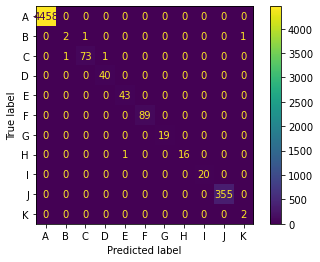

In [ ]:
plot_confusion_matrix(clf_2, X_test, y_test, display_labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'])  
plt.show()

In [ ]:
# save the model
filename = 'finalized_model_multiclassification.sav'
pickle.dump(clf_2, open(filename, 'wb'))

##Use another model **KNN**

In [ ]:
clf_3 = KNeighborsClassifier(n_jobs=-1)
scores_2 = cross_val_score(clf_2, X_train, y_train, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


In [ ]:
# get the average score from scores which returned back from cross validation
avg_2 = sum(scores_2)/len(scores_2)
print(avg_2)

0.9991702554981089


In [ ]:
clf_3.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
predict = clf_3.predict(X_test)

## The prediction probabilities will be used laterfor ROC curve

In [ ]:
pred_proba_2 = clf_3.predict_proba(X_test)[::,1]

In [ ]:
acc_2 = accuracy_score(y_test, predict)
acc_2

0.9945333853963295

In [ ]:
print(classification_report(y_test, predict))

                       precision    recall  f1-score   support

               BENIGN       1.00      1.00      1.00      4458
  gafgyt_combo_attack       0.00      0.00      0.00         4
   gafgyt_junk_attack       0.95      0.99      0.97        75
   gafgyt_scan_attack       0.95      1.00      0.98        40
    gafgyt_tcp_attack       1.00      1.00      1.00        43
    gafgyt_udp_attack       1.00      1.00      1.00        89
     mirai_ack_attack       0.00      0.00      0.00        19
    mirai_scan_attack       1.00      0.94      0.97        17
     mirai_syn_attack       1.00      1.00      1.00        20
     mirai_udp_attack       0.94      1.00      0.97       355
mirai_udpplain_attack       1.00      0.50      0.67         2

             accuracy                           0.99      5122
            macro avg       0.80      0.77      0.78      5122
         weighted avg       0.99      0.99      0.99      5122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


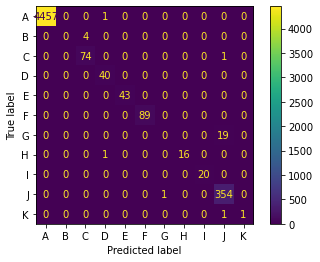

In [ ]:
plot_confusion_matrix(clf_3, X_test, y_test, display_labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'])  
plt.show()

In [ ]:
#set numberfor each class names in a list which will be used later to plot line graph
yy_test = []
for i in range(len(y_test)):
  if(y_test[i]=='BENIGN'):
    y_test[i] = 0
  elif(y_test[i]=='mirai_udp_attack'):
    y_test[i] = 1
  elif(y_test[i]=='gafgyt_udp_attack'):
    y_test[i] = 2
  elif(y_test[i]=='gafgyt_junk_attack'):
    y_test[i] = 3
  elif(y_test[i]=='gafgyt_tcp_attack'):
    y_test[i] = 4
  elif(y_test[i]=='gafgyt_scan_attack'):
    y_test[i] = 5
  elif(y_test[i]=='mirai_syn_attack'):
    y_test[i] = 6
  elif(y_test[i]=='mirai_ack_attack'):
    y_test[i] = 7
  elif(y_test[i]=='mirai_scan_attack'):
    y_test[i] = 8
  elif(y_test[i]=='gafgyt_combo_attack'):
    y_test[i] = 9
  elif(y_test[i]=='mirai_udpplain_attack'):
    y_test[i] = 10

  yy_test.append(y_test[i])

In [ ]:
#plot ROC curve for multi class classification
def plot_roc_curve(yy_test, pred_proba, class_name):
  fpr = {}#get false positive rate for all classes
  tpr = {}#get true positive rate for all classes
  thresh ={}

  class_num = 11

  for i in range(class_num):    
      fpr[i], tpr[i], thresh[i] = roc_curve(yy_test, pred_proba, pos_label=i)
        
  plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='Class 1')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3')
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 4')
  plt.plot(fpr[4], tpr[4], linestyle='--',color='teal', label='Class 5')
  plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 6')
  plt.plot(fpr[6], tpr[6], linestyle='--',color='orange', label='Class 7')
  plt.plot(fpr[7], tpr[7], linestyle='--',color='gray', label='Class 8')
  plt.plot(fpr[8], tpr[8], linestyle='--',color='brown', label='Class 9')
  plt.plot(fpr[9], tpr[9], linestyle='--',color='lime', label='Class 10')
  plt.plot(fpr[10], tpr[10], linestyle='--',color='maroon', label='Class 11')
  plt.title('Multiclass ROC curve from'+ class_name +' model')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC '+class_name, dpi=300); 

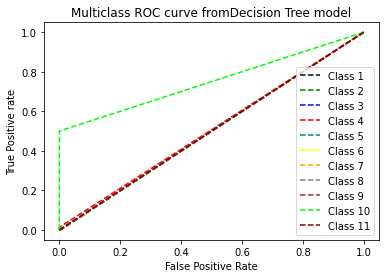

In [ ]:
plot_roc_curve(yy_test, pred_proba, 'Decision Tree')

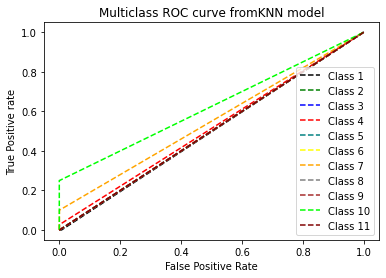

In [ ]:
plot_roc_curve(yy_test, pred_proba_2, 'KNN')

## References:
### - Categorical, C., 2015. Check which columns in DataFrame are Categorical. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical>
### - scikit-learn. 2021. sklearn.ensemble.AdaBoostClassifier. [online] Available at: <https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html>
### - Analytics India Magazine. 2021. Hands-On Guide To Automated Feature Selection Using Boruta. [online] Available at: <https://analyticsindiamag.com/hands-on-guide-to-automated-feature-selection-using-boruta/>